In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [ ]:
df = pd.read_csv('NF-BoT-IoT1.csv')
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.100.6,52670,192.168.100.1,53,17,9.2,71,126,1,1,0,4294966,0,Benign
1,192.168.100.6,49160,192.168.100.149,4444,6,0.0,217753000,199100,4521,4049,24,4176249,1,Theft
2,192.168.100.46,3456,192.168.100.5,80,17,0.0,8508021,8918372,9086,9086,0,4175916,0,Benign
3,192.168.100.3,80,192.168.100.55,8080,6,7.0,8442138,9013406,9086,9086,0,4175916,0,Benign
4,192.168.100.46,80,192.168.100.5,80,6,7.0,8374706,0,9086,0,0,4175916,0,Benign


In [ ]:
df.isnull().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600100 entries, 0 to 600099
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   IPV4_SRC_ADDR               600100 non-null  object 
 1   L4_SRC_PORT                 600100 non-null  int64  
 2   IPV4_DST_ADDR               600100 non-null  object 
 3   L4_DST_PORT                 600100 non-null  int64  
 4   PROTOCOL                    600100 non-null  int64  
 5   L7_PROTO                    600100 non-null  float64
 6   IN_BYTES                    600100 non-null  int64  
 7   OUT_BYTES                   600100 non-null  int64  
 8   IN_PKTS                     600100 non-null  int64  
 9   OUT_PKTS                    600100 non-null  int64  
 10  TCP_FLAGS                   600100 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  600100 non-null  int64  
 12  Label                       600100 non-null  int64  
 13  Attack        

In [ ]:
#Check for duplicates
df.duplicated().sum()

0

In [ ]:
df.drop(['Attack', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'], axis=1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600100 entries, 0 to 600099
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 600100 non-null  int64  
 1   L4_DST_PORT                 600100 non-null  int64  
 2   PROTOCOL                    600100 non-null  int64  
 3   L7_PROTO                    600100 non-null  float64
 4   IN_BYTES                    600100 non-null  int64  
 5   OUT_BYTES                   600100 non-null  int64  
 6   IN_PKTS                     600100 non-null  int64  
 7   OUT_PKTS                    600100 non-null  int64  
 8   TCP_FLAGS                   600100 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  600100 non-null  int64  
 10  Label                       600100 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 50.4 MB


#Feature Selection
Checking for correlation

In [ ]:
#Features with negligible correlation
Correlation_matrix= df.corr()
non_correlated=Correlation_matrix[abs(Correlation_matrix['Label'])<0.1]
non_correlated


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
L4_DST_PORT,-0.058956,1.000000,0.210926,-0.107788,-0.008967,0.009567,-0.021223,-0.004728,-0.197868,0.046861,-0.019538
OUT_BYTES,-0.029019,0.009567,0.007441,-0.001660,0.061473,1.000000,0.211921,0.568696,-0.010458,0.003238,-0.027669
FLOW_DURATION_MILLISECONDS,0.006821,0.046861,-0.404887,0.048403,0.007102,0.003238,0.012614,0.006727,0.219374,1.000000,0.016333


<Axes: >

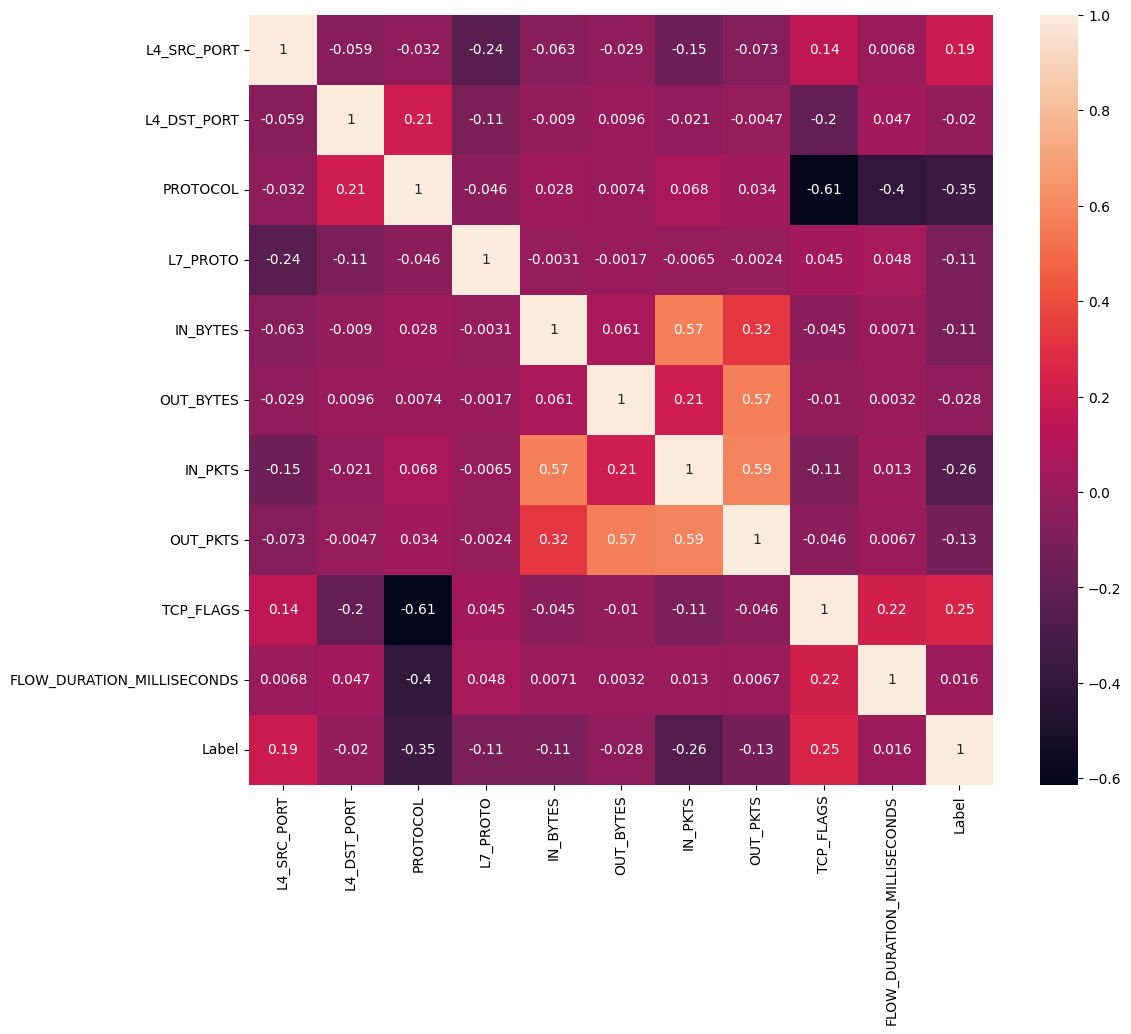

In [ ]:
#Plot the figure
fig, ax=plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
Correlation_Matrix= df.corr()
non_correlated= Correlation_Matrix.index[abs(Correlation_Matrix['Label'])<0.1]
non_correlated


Index(['L4_DST_PORT', 'OUT_BYTES', 'FLOW_DURATION_MILLISECONDS'], dtype='object')

In [ ]:
df.drop(['L4_DST_PORT', 'IN_BYTES', 'OUT_BYTES', 'FLOW_DURATION_MILLISECONDS'], axis=1, inplace=True)

In [ ]:
df

,L4_SRC_PORT,PROTOCOL,L7_PROTO,IN_PKTS,OUT_PKTS,TCP_FLAGS,Label
0,52670,17,9.200,1,1,0,0
1,49160,6,0.000,4521,4049,24,1
2,3456,17,0.000,9086,9086,0,0
3,80,6,7.000,9086,9086,0,0
4,80,6,7.000,9086,0,0,0
...,...,...,...,...,...,...,...
600095,80,6,7.000,2523,0,0,0
600096,0,6,0.000,1513,0,0,0
600097,365,17,0.000,1357,0,0,0
600098,50850,6,222.178,32,32,24,0


In [ ]:
df['Label'].value_counts()

1    586241
0     13859
Name: Label, dtype: int64

#SMOTE OVERSAMPLING

In [ ]:
normal = df[df['Label']==0]
attack = df[df['Label']==1]

In [ ]:
normal.shape

(13859, 7)

In [ ]:
attack.shape

(586241, 7)

In [ ]:
attack_new = attack.sample(n=13859)

In [ ]:
attack_new.shape

(13859, 7)

In [ ]:
new_data = pd.concat([normal, attack_new], ignore_index=True)
new_data

,L4_SRC_PORT,PROTOCOL,L7_PROTO,IN_PKTS,OUT_PKTS,TCP_FLAGS,Label
0,52670,17,9.2,1,1,0,0
1,3456,17,0.0,9086,9086,0,0
2,80,6,7.0,9086,9086,0,0
3,80,6,7.0,9086,0,0,0
4,0,6,0.0,5452,0,0,0
...,...,...,...,...,...,...,...
27713,40281,6,0.0,1,1,22,1
27714,64246,6,0.0,1,1,22,1
27715,48974,6,0.0,1,1,22,1
27716,58427,6,0.0,1,1,22,1


In [ ]:
new_data['Label'].value_counts()

0    13859
1    13859
Name: Label, dtype: int64

In [ ]:
new_data

,L4_SRC_PORT,PROTOCOL,L7_PROTO,IN_PKTS,OUT_PKTS,TCP_FLAGS,Label
0,52670,17,9.2,1,1,0,0
1,3456,17,0.0,9086,9086,0,0
2,80,6,7.0,9086,9086,0,0
3,80,6,7.0,9086,0,0,0
4,0,6,0.0,5452,0,0,0
...,...,...,...,...,...,...,...
27713,40281,6,0.0,1,1,22,1
27714,64246,6,0.0,1,1,22,1
27715,48974,6,0.0,1,1,22,1
27716,58427,6,0.0,1,1,22,1


In [ ]:
y=new_data['Label']
y

0        0
1        0
2        0
3        0
4        0
        ..
27713    1
27714    1
27715    1
27716    1
27717    1
Name: Label, Length: 27718, dtype: int64

In [ ]:
X=new_data.drop('Label', axis=1)

#Splitting the dataset


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Normalization

In [ ]:
#Using standard scaler to standardize and transform the data in such a way that the features have a similar scale,
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)



In [ ]:
X_train

array([[-1.86970158, -0.66782643,  3.49512952, -0.19600035, -0.11183728,
         0.38055937],
       [-0.30936595, -0.66782643, -0.34232867, -0.19600035, -0.11183728,
         0.54376927],
       [ 0.26701818, -0.66782643, -0.22946225, -0.19142821, -0.10765725,
         1.27821385],
       ...,
       [-0.08185566,  1.4790798 , -0.25967821, -0.19600035, -0.11183728,
        -1.2515397 ],
       [ 0.45651288,  1.4790798 , -0.34232867, -0.19600035, -0.11323062,
        -1.2515397 ],
       [ 1.2504925 , -0.66782643, -0.34232867, -0.19600035, -0.11183728,
         0.54376927]])

In [ ]:
X_test

array([[ 0.75406304, -0.66782643, -0.22946225, -0.19508592, -0.11323062,
         0.54376927],
       [ 0.46329949, -0.66782643, -0.22946225, -0.19234263, -0.10765725,
         0.95179404],
       [-2.07595071,  1.4790798 , -0.34232867,  2.10196115, -0.11323062,
        -1.2515397 ],
       ...,
       [-0.23890192, -0.66782643, -0.22946225, -0.19234263, -0.10765725,
         0.95179404],
       [-0.14696464, -0.66782643, -0.22946225, -0.19508592, -0.11323062,
         0.54376927],
       [-0.11409203, -0.66782643, -0.34232867, -0.19051378, -0.10487056,
         0.95179404]])

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
classifier= SVC(kernel='linear', random_state=42)

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Predicting the test result

In [ ]:
y_pred= classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9054834054834054

In [ ]:
precision_score(y_test, y_pred)

0.8741542625169147

In [ ]:
recall_score(y_test, y_pred)

0.9444444444444444

In [ ]:
f1_score(y_test, y_pred)

0.9079409697821504

In [ ]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[2436  372]
 [ 152 2584]]


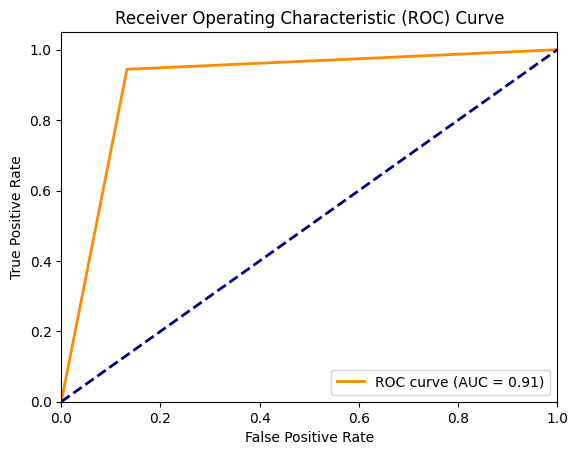

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example predictions and true labels
predictions = [0.1, 0.4, 0.35, 0.8, 0.6]
true_labels = [0, 1, 1, 0, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=42)
classifier2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
y_pred2=classifier2.predict(X_test)
y_pred2

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
accuracy_score(y_test, y_pred2)

0.9792568542568543

In [ ]:
precision_score(y_test, y_pred2)

0.9906402096593037

In [ ]:
recall_score(y_test, y_pred2)

0.9671052631578947

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred3= classifier3.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.6928210678210678

In [ ]:
precision_score(y_test, y_pred3)

0.6207057723767235

In [ ]:
recall_score(y_test, y_pred3)

0.9707602339181286

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier9= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier9.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred4= classifier9.predict(X_test)


In [ ]:
accuracy_score(y_pred4, y_test)

0.9814213564213564

In [ ]:
precision_score(y_pred4, y_test)

0.9703947368421053

In [ ]:
recall_score(y_pred4, y_test)

0.9917818453492716

In [ ]:
f1_score(y_pred4, y_test)

0.9809717347127287

XGBOOST

In [ ]:
from xgboost import XGBClassifier
classifier6 = XGBClassifier()
classifier6.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred6= classifier6.predict(X_test)

In [ ]:
accuracy_score(y_pred6, y_test)

0.9792568542568543

In [ ]:
precision_score(y_pred6, y_test)

0.9605263157894737

In [ ]:
recall_score(y_pred6, y_test)

0.9973434535104364

MLP ANN

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 5)

Epoch 1/5
693/693 [==============================] - 4s 3ms/step - loss: 0.3940 - accuracy: 0.8744
Epoch 2/5
693/693 [==============================] - 2s 2ms/step - loss: 0.3125 - accuracy: 0.8988
Epoch 3/5
693/693 [==============================] - 2s 2ms/step - loss: 0.2767 - accuracy: 0.9033
Epoch 4/5
693/693 [==============================] - 1s 2ms/step - loss: 0.2504 - accuracy: 0.9054
Epoch 5/5
693/693 [==============================] - 2s 2ms/step - loss: 0.2365 - accuracy: 0.9061


In [ ]:
y_pred33 = ann.predict(X_test)

174/174 [==============================] - 1s 6ms/step


In [ ]:
y_pred33=(y_pred > 0.5)
y_pred33
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [ ]:
accuracy_score(y_test, y_pred33)

0.9058441558441559

In [ ]:
precision_score(y_pred33, y_test)

0.9470029239766082

In [ ]:
recall_score(y_pred33, y_test)

0.8729784366576819

In [ ]:
y[model2.argmax()]

NameError: name 'model2' is not defined